In [1]:
%matplotlib inline
%load_ext autoreload      
%autoreload 2     

import sys
import copy
import numpy as np
from numpy import sqrt, pi, exp, cos, sin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.append("../")
from qo_simulator_1ph import QOsimulator_1ph as QOsimulator
path_to_qo_object = "../qo_object/"
sys.path.append(path_to_qo_object)
from qo_object import QOobject, Mirror, BeamSplitter, PolarizationRotator
path_to_qo_beam = "../qo_beam/"
sys.path.append(path_to_qo_beam)
from qo_beam import QObeam

In [2]:
## set parameters
N       = (2*256, 256)     # number of grid in the x and y directions
L       = (2*10*pi, 10*pi) # Size of space in the x and y dicrections
## Photon parameters
x0      = 2.0      # initial position x
y0      = L[1]/2   # initial position y
kx0     = 10.0     # center of initial k-space distribution (k_x axis)
ky0     = 0.0      # center of initial k-space distribution (k_y axis)
sigma_x = 2.0
sigma_y = 2.0
theta_pol = 0.0 # linear polarization angle
theta_rot = pi/4 # rotation angle of polarization rotator
##
dt      = 0.1  
t_max   = 55
n_divide= 5

## set photon input

In [3]:
beam = QObeam(N, L, x0, y0, kx0, ky0,sigma_x, sigma_y, theta_pol=theta_pol)

# QOobject

## Configurate mirror and polarization rotator

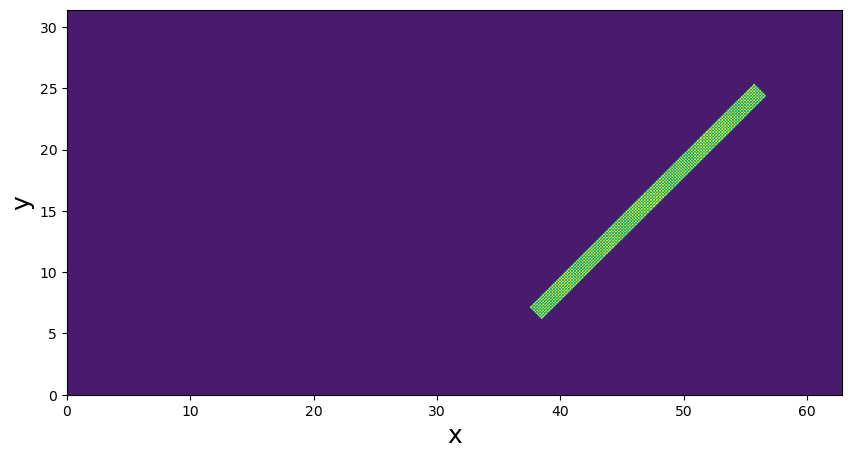

In [4]:
center_nx = int(N[0]/4*3)
center_ny = int(N[1]/2)
##
mirror = Mirror(N, L, center_nx, center_ny, size=1.5, angle=45, beam=beam, which_pol="V")
mirror.show()

----> optimizing omega_j for Polarization rotator...
----> Result: omega_j=1.171051, diff_prob=0.000982



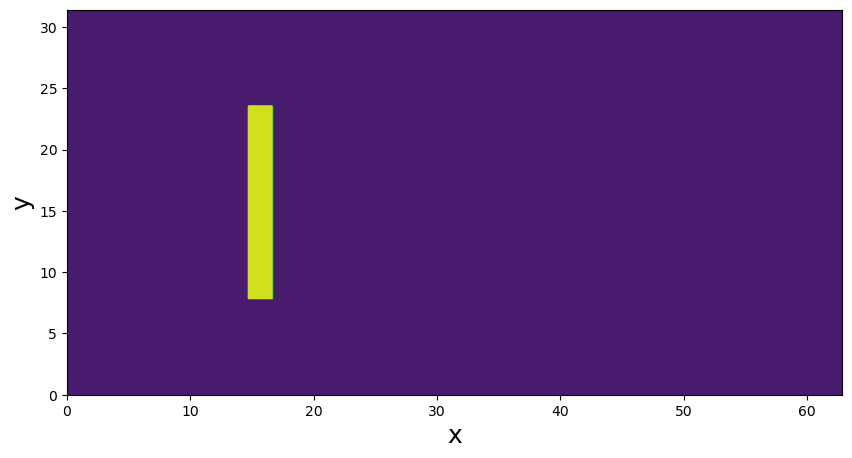

In [5]:
center_nx = int(N[0]/4)
center_ny = int(N[1]/2)
##
pol_rotator = PolarizationRotator(N, L, center_nx, center_ny, size=1.0, angle=90, beam=beam, theta_rot=theta_rot, Lexp=5*pi)
pol_rotator.show()

## Main routine

In [6]:
def gen_show_tlist(t_max, n_divide):
    tlist = []
    for i in range(int(t_max/dt)+1):
        t = i*dt
        tlist.append(t)
    res = [ elem[0] for elem in np.array_split(tlist, n_divide)]
    res.append(tlist[-1])
    return  res

def show_info(qosim,  phi, t):
    print("#------- t=", round(t,3))
    prob_ph=phi.ph.probability()
    prob_A = phi.A.probability()
    print("|c_ph|^2, |c_A|^2 = ",  round(prob_ph,5), round(prob_A,5) )
    print("sum |c|^2=", round(prob_ph+prob_A, 5))
    # Energy
    eF=qosim.calc_EF(phi)
    eA=qosim.calc_EA(phi)
    eI=qosim.calc_EI(phi)
    econst=qosim.calc_Econst()
    print("E_F, E_A, E_I, econst =", round(eF,5), round(eA,5), round(eI,5), round(econst,5))
    print("Total energy = ", round(eF + eA + eI + econst, 5))
    print("Total energy - econst = ", round(eF + eA + eI, 5))
    ## Check sum of photon number density
    interval_of_cf = np.linspace(0,0.0005,11)
    density = phi.ph.partial_density(_in="r")
    mat = np.zeros((qosim.N[0], qosim.N[1]))
    for _obj in qosim.objects:
        for idx in _obj.atom_pos_indices:
            mat[idx[0],idx[1]] = 1
    im, title = qosim.show(density[0], t, levels=interval_of_cf, extend="both")
    plt.contour(qosim.qosim_1ph.x, qosim.qosim_1ph.y, mat.T, colors="gray")            
    plt.title("t=%.2f, |H> part" % t, fontsize=18)
    im, title = qosim.show(density[1], t, cmap="inferno", levels=interval_of_cf, extend="both")
    plt.title("|V> part", fontsize=18)
    plt.contour(qosim.qosim_1ph.x, qosim.qosim_1ph.y, mat.T, colors="gray")            
    plt.show()
    return im, title

show_tlist = gen_show_tlist(t_max, n_divide=n_divide)

#------- t= 0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -8338.31182
Total energy =  -8328.30556
Total energy - econst =  10.00625


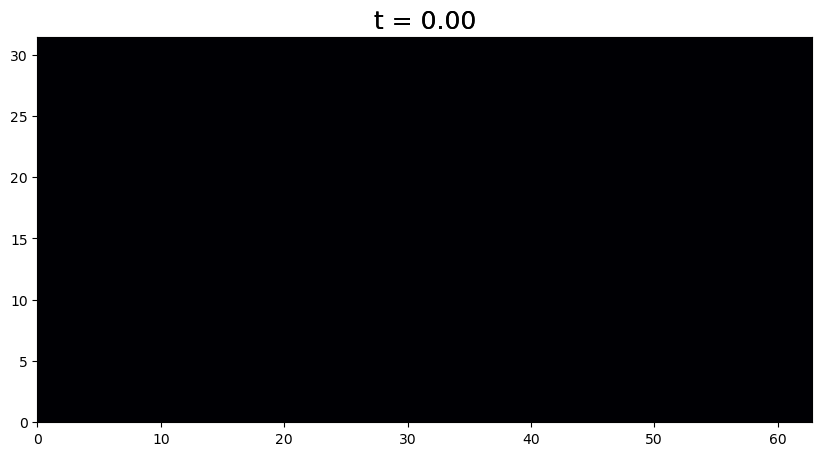

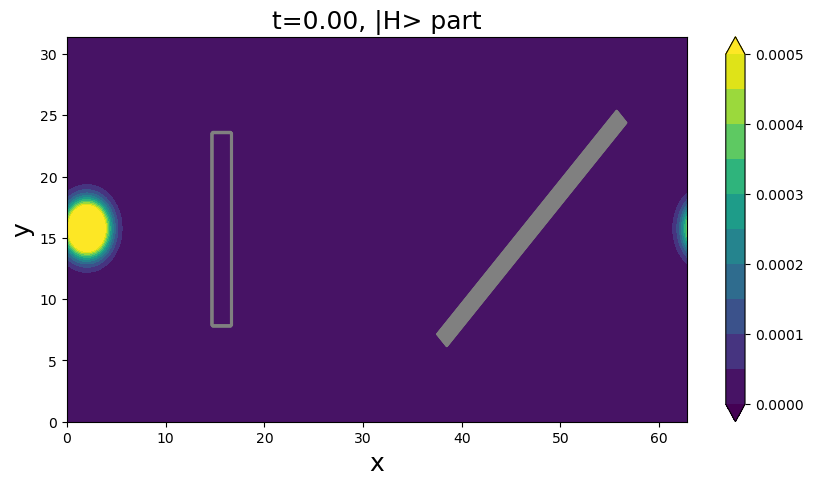

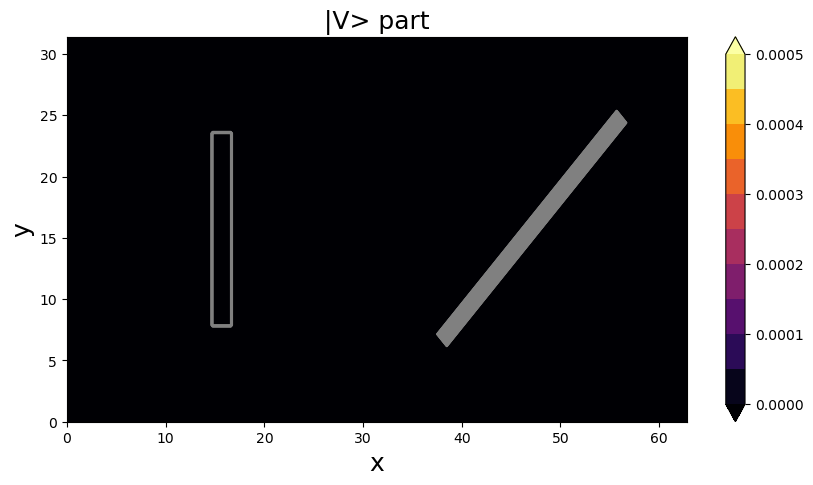

(<matplotlib.contour.QuadContourSet at 0x12f1fdcd0>,
 Text(0.5, 1.01, 't = 0.00'))

In [7]:
qosim = QOsimulator(N, L, dt, beam = beam, objects=[pol_rotator, mirror], calc_pol=True)
init_phi = qosim.gen_initial_state()
show_info(qosim, init_phi  , t=0)

## 時間発展

#------- t= 0.0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -8338.31182
Total energy =  -8328.30556
Total energy - econst =  10.00625


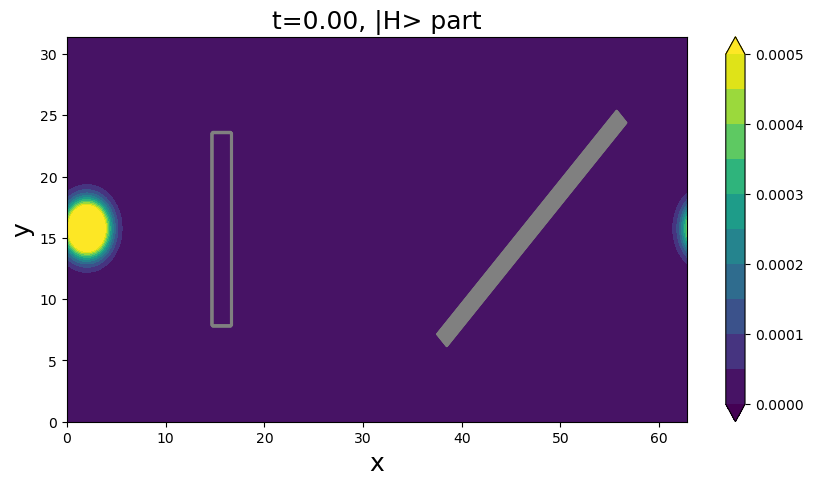

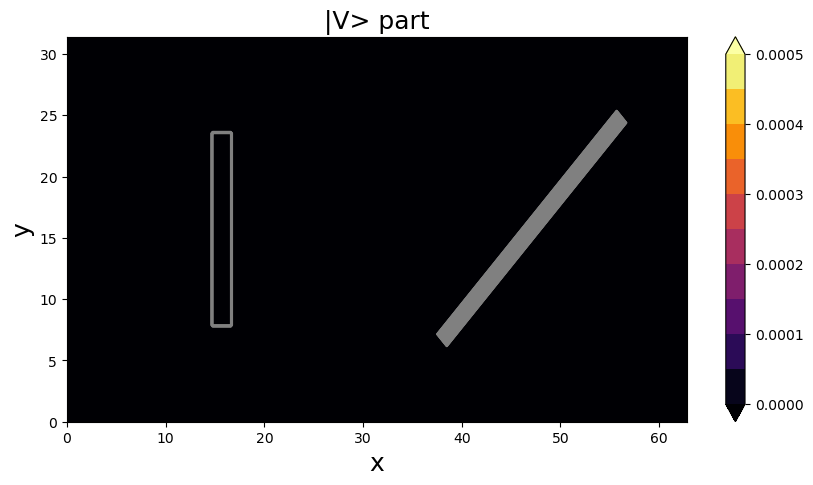

#------- t= 11.1
|c_ph|^2, |c_A|^2 =  0.99692 0.00308
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.9508 0.00722 0.0341 -8338.31182
Total energy =  -8328.3197
Total energy - econst =  9.99211


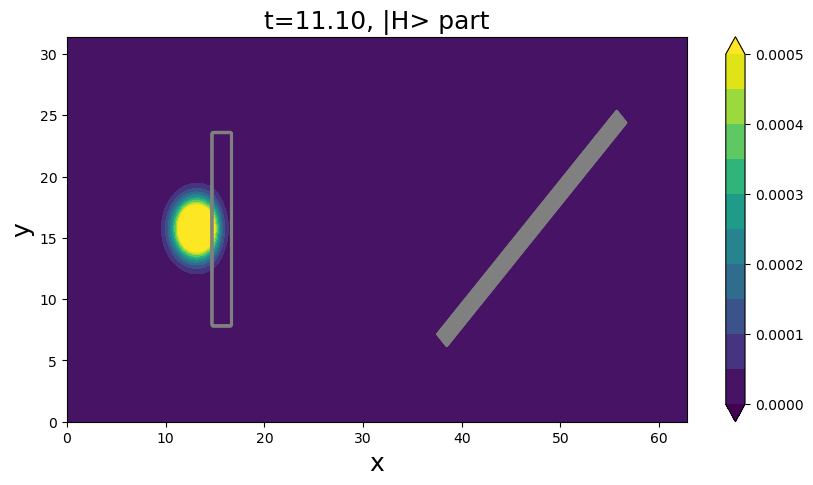

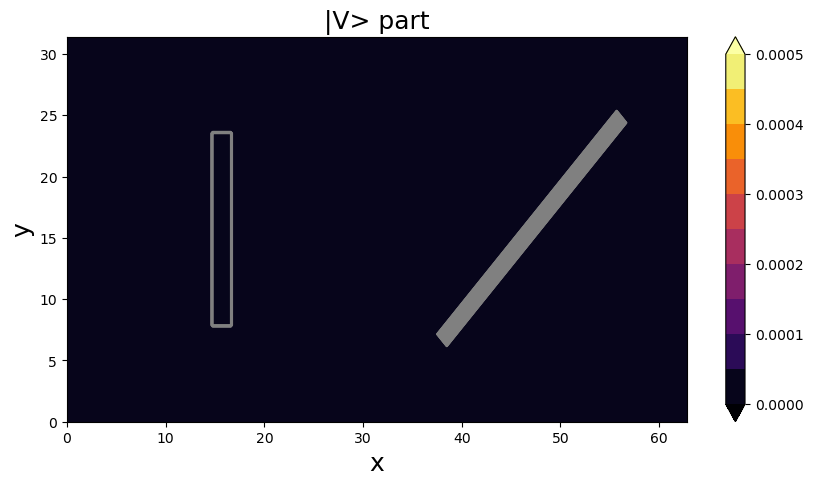

#------- t= 22.1
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 1e-05 -8338.31182
Total energy =  -8328.30556
Total energy - econst =  10.00625


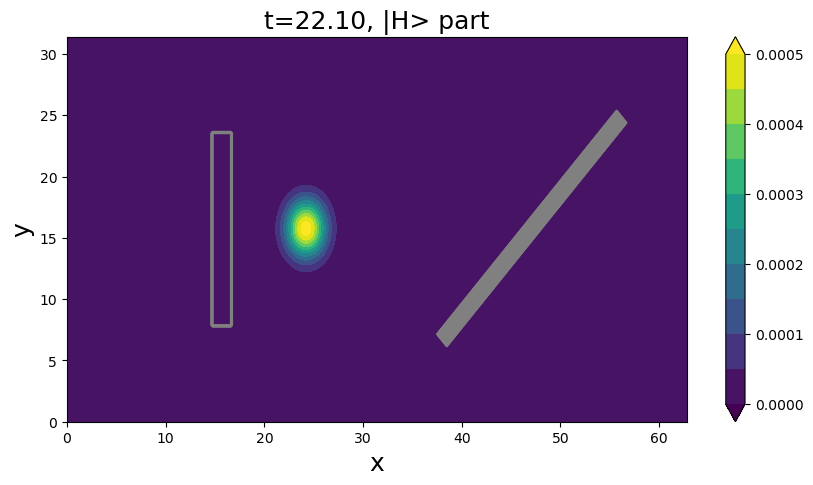

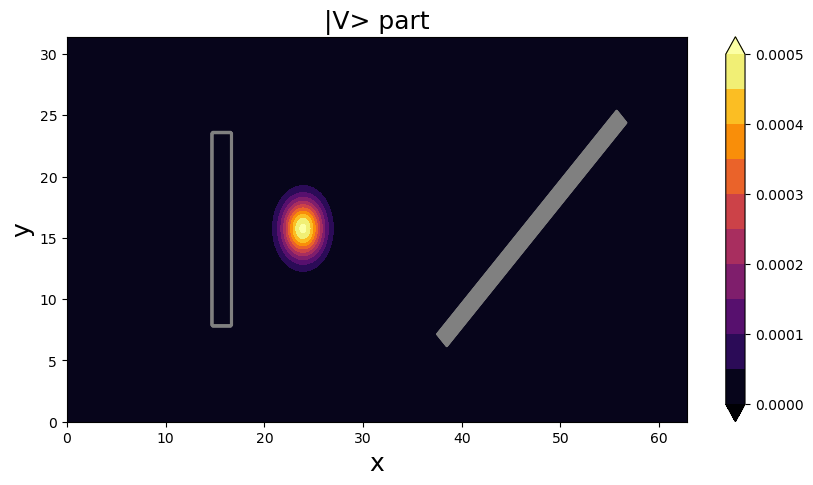

#------- t= 33.1
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 -0.0 -8338.31182
Total energy =  -8328.30556
Total energy - econst =  10.00625


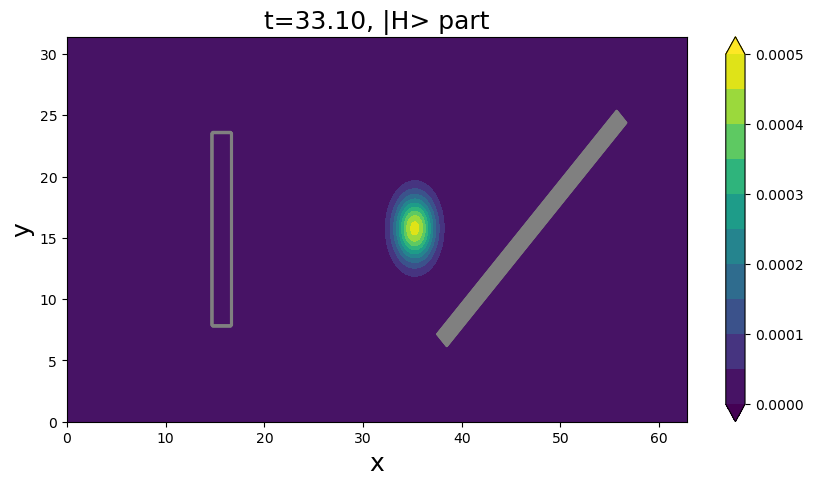

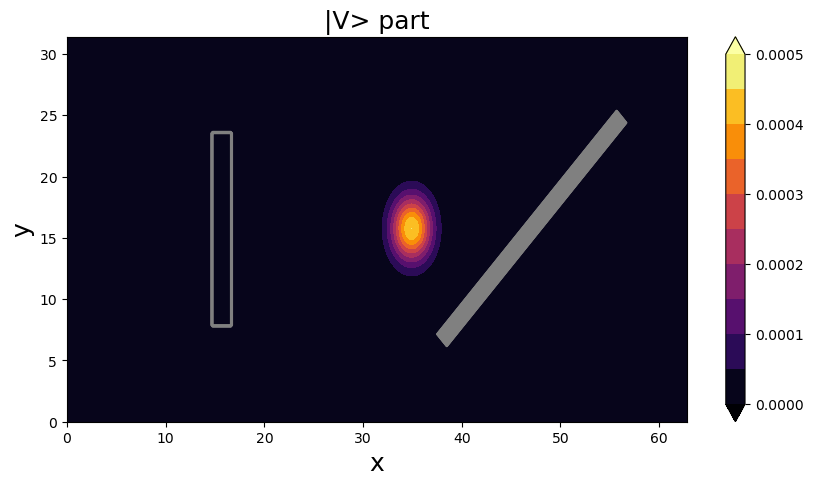

#------- t= 44.1
|c_ph|^2, |c_A|^2 =  0.98768 0.01232
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.87913 0.12317 0.0002 -8338.31182
Total energy =  -8328.30931
Total energy - econst =  10.00251


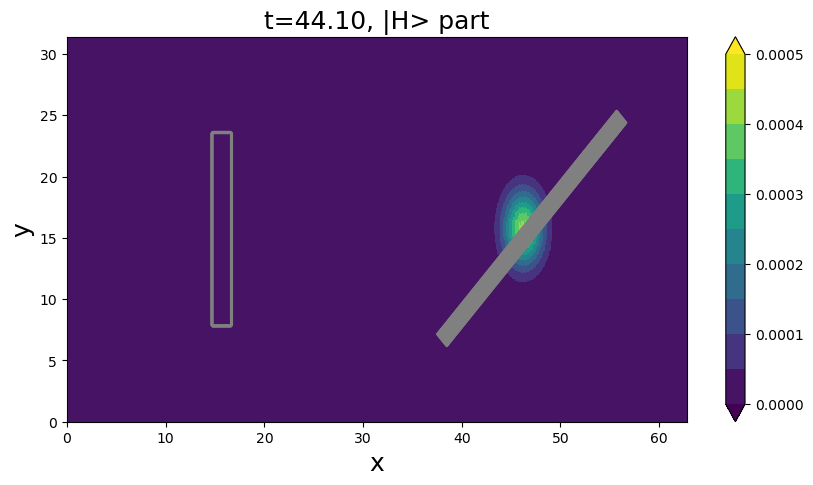

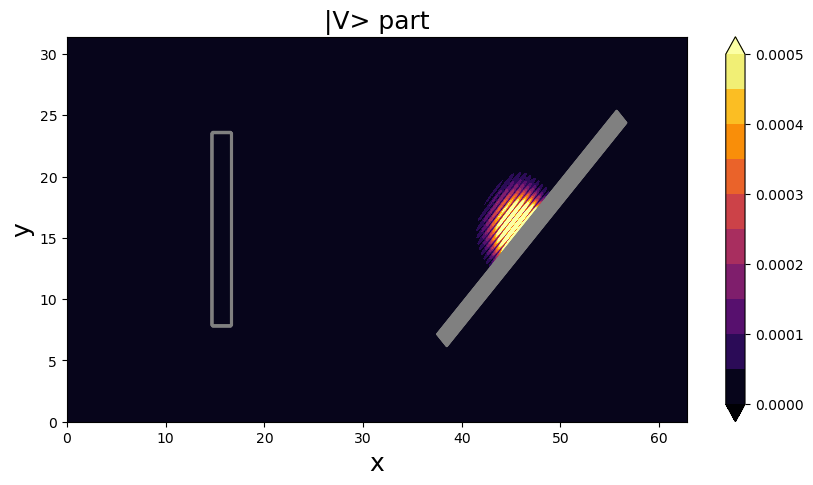

#------- t= 55.0
|c_ph|^2, |c_A|^2 =  0.99999 1e-05
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00617 8e-05 -0.0 -8338.31182
Total energy =  -8328.30557
Total energy - econst =  10.00625


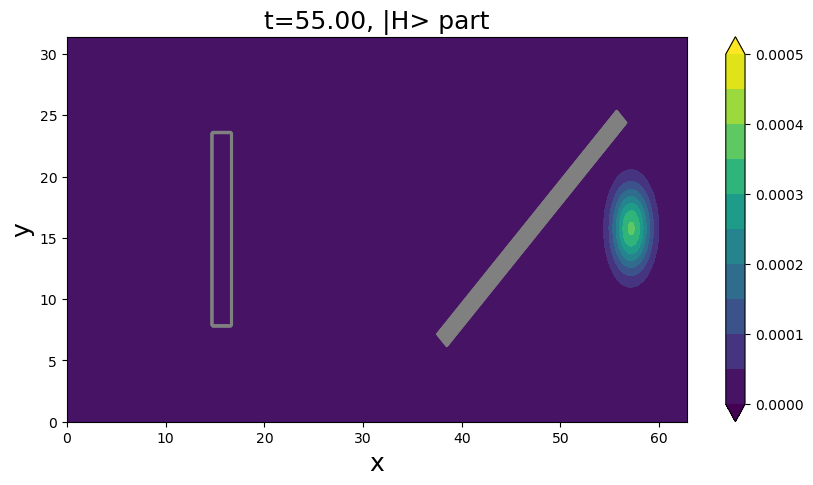

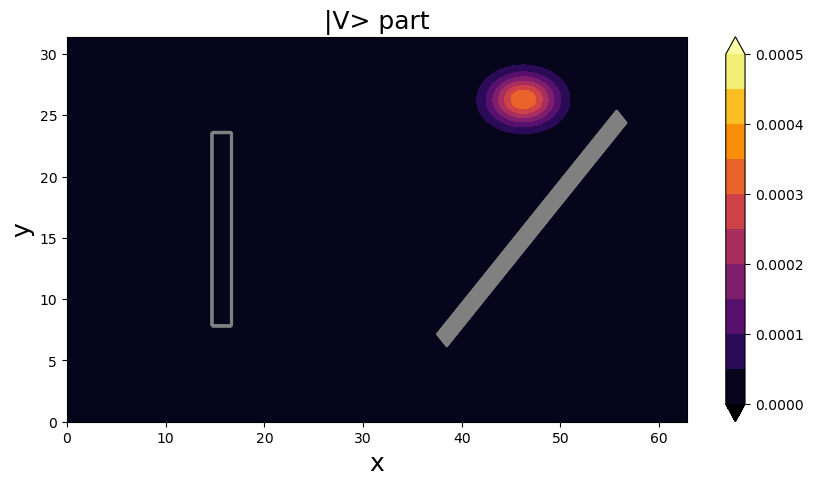

CPU times: user 19.3 s, sys: 3.02 s, total: 22.3 s
Wall time: 22.3 s


In [8]:
%%time
for i in range(int(t_max/dt)+1):
    t = i*dt
    if i == 0:
        phi = copy.deepcopy(init_phi)
    else:
        phi = qosim.suzuki_trotter_step(phi)
    ##
    if t in show_tlist:
        im, title = show_info(qosim, phi, t)    

# Rotation angle dependece

CPU times: user 4min 17s, sys: 32.7 s, total: 4min 50s
Wall time: 4min 50s


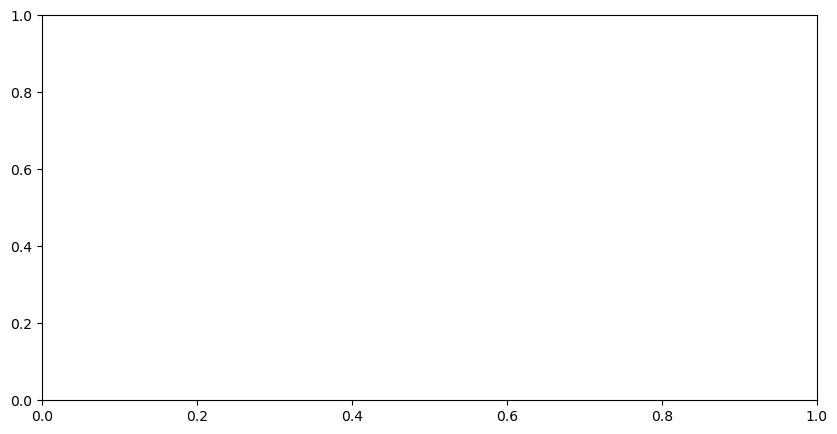

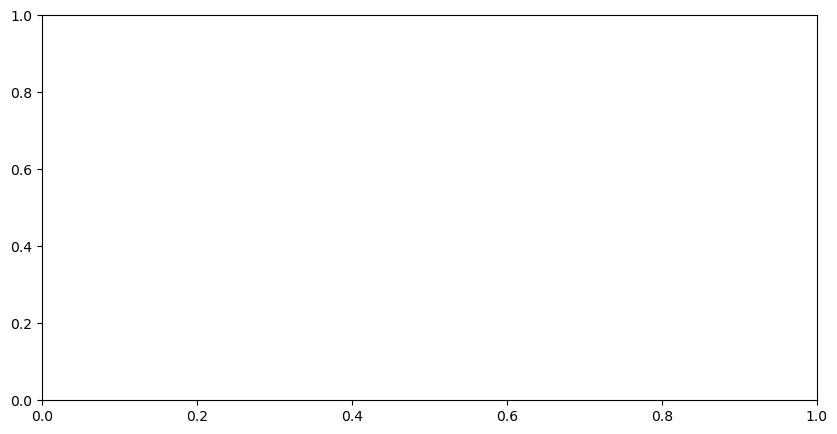

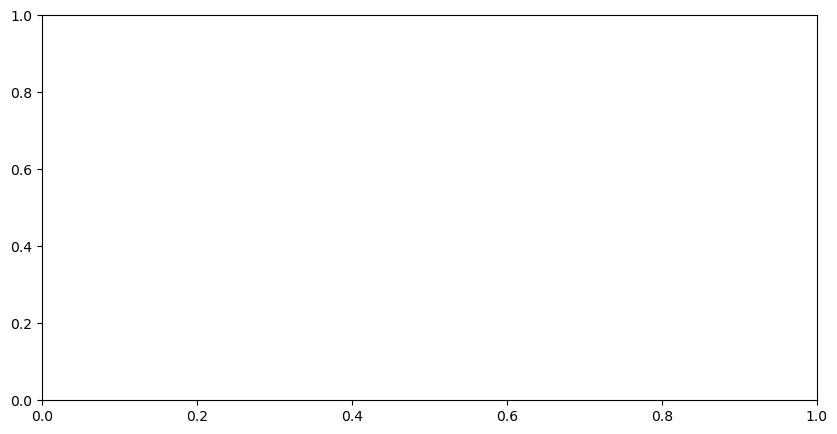

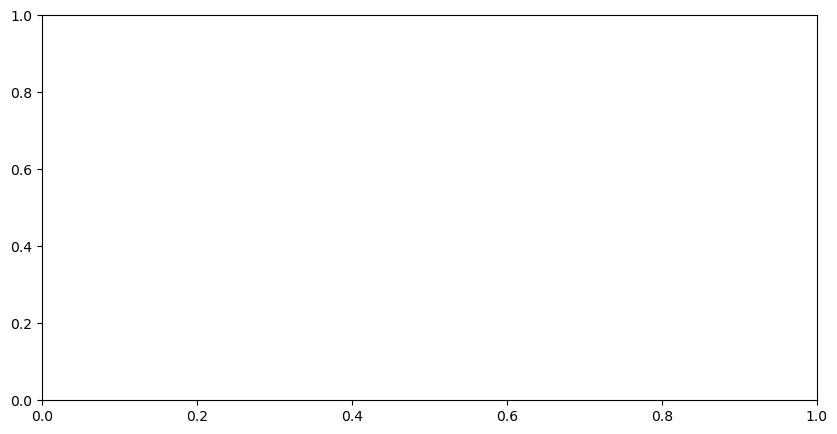

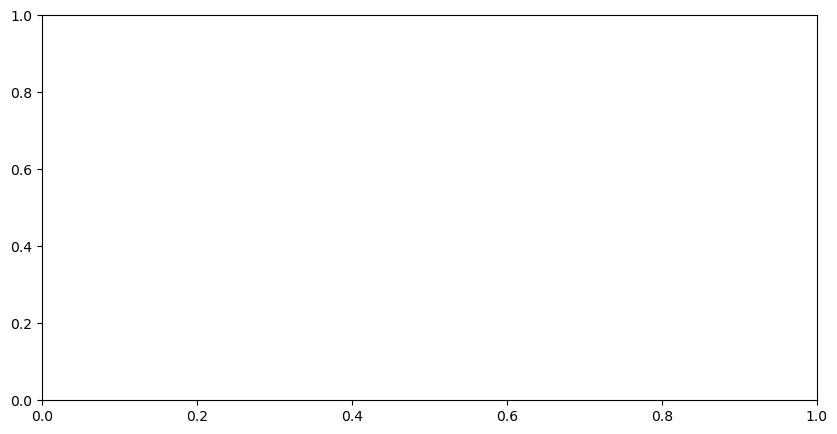

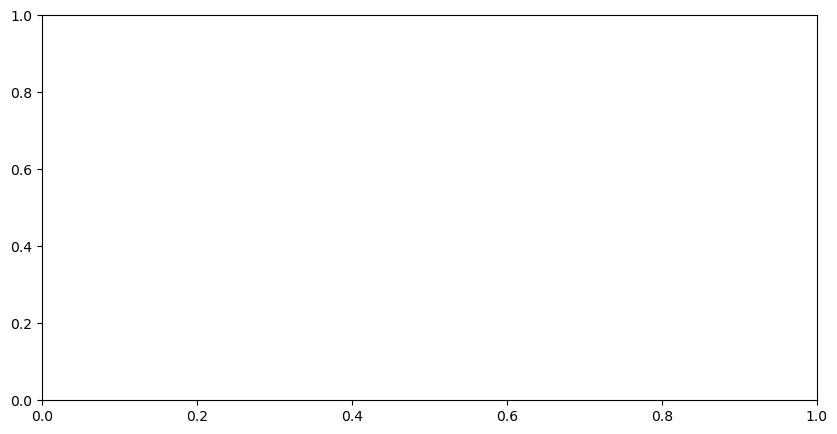

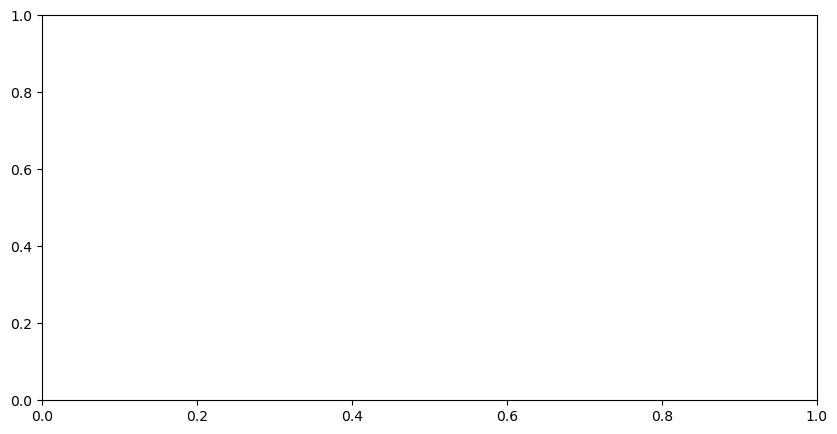

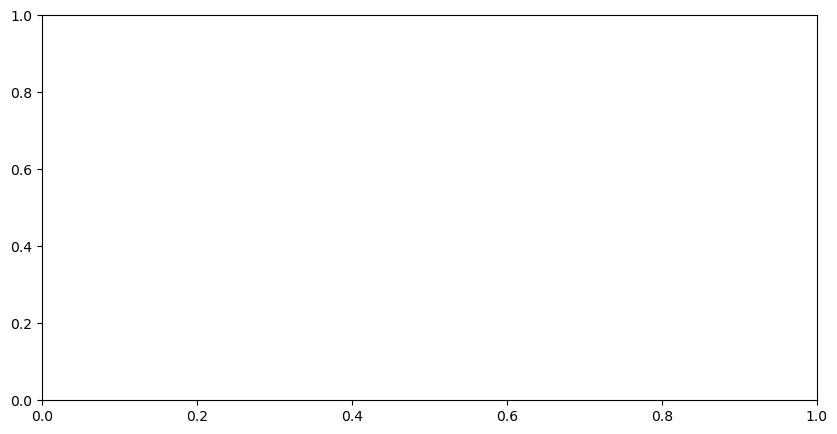

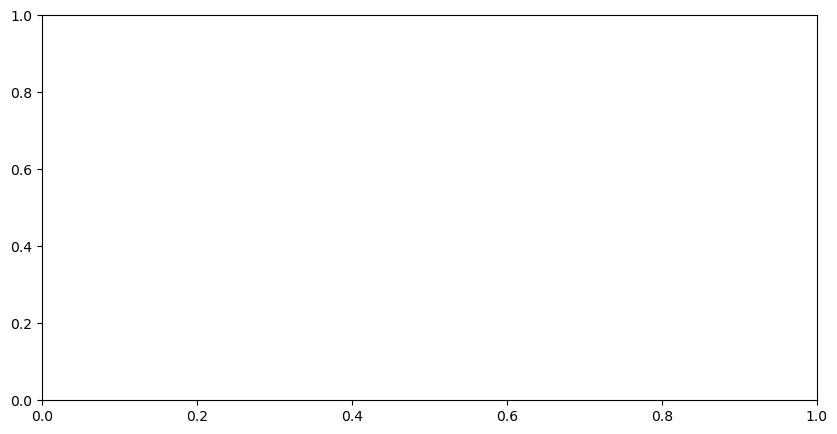

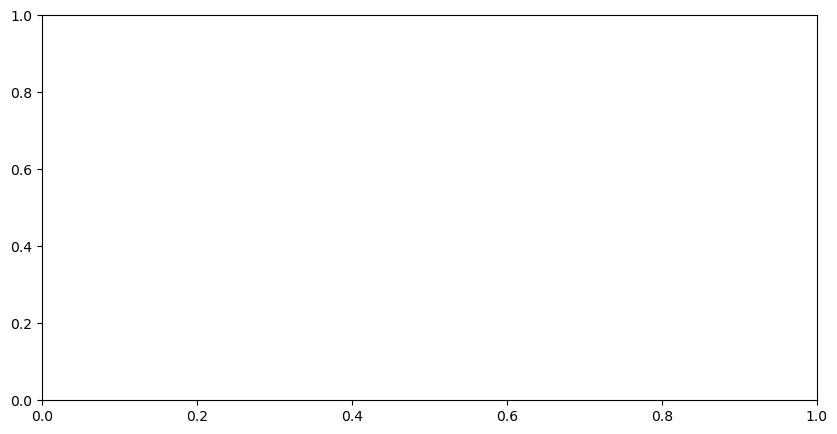

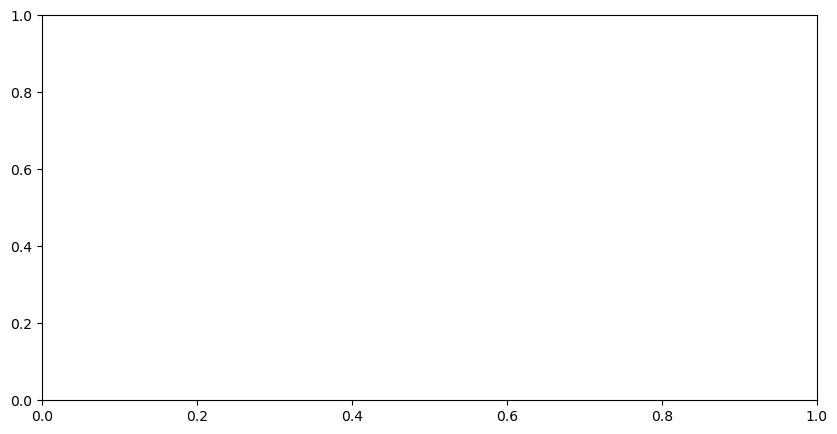

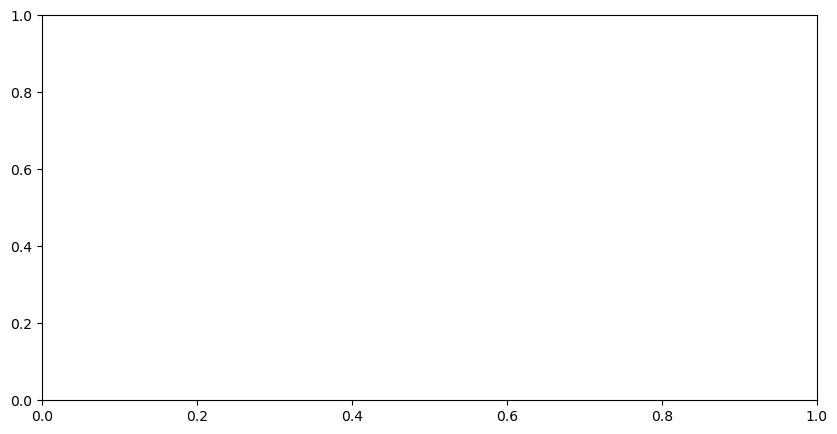

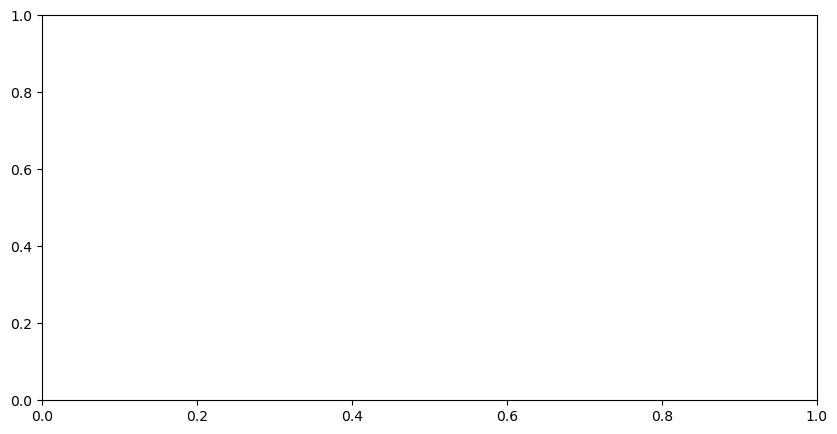

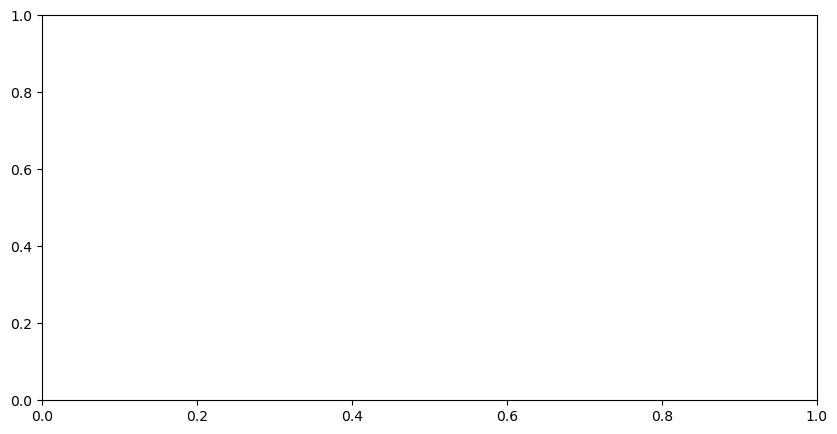

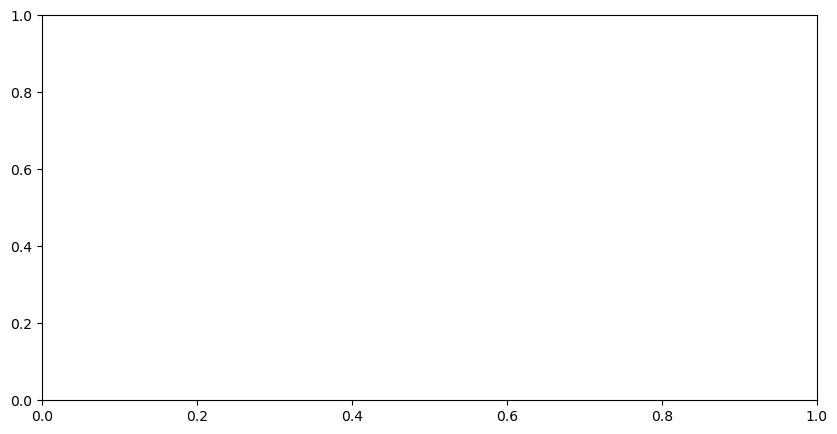

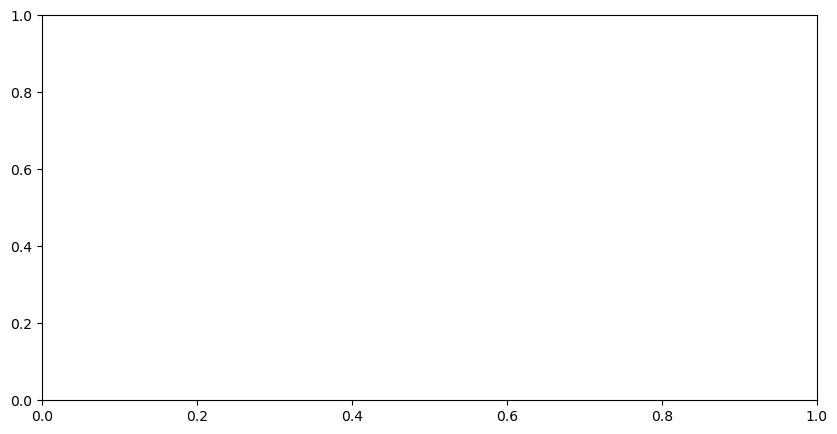

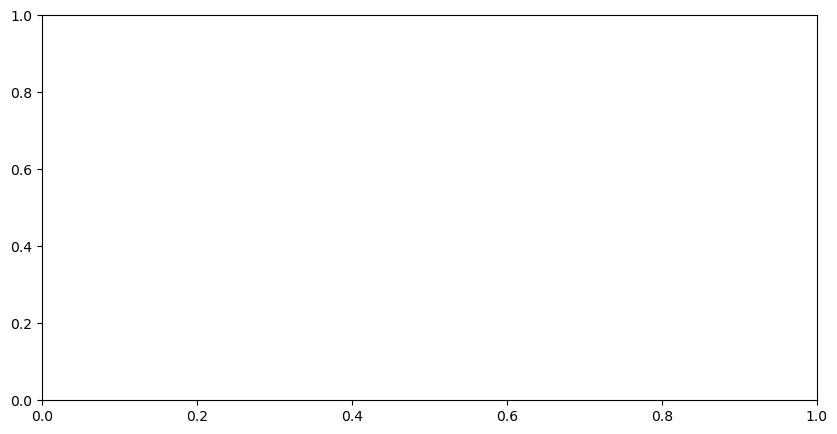

In [9]:
%%time
theta_rots = np.linspace(0,pi/2,17)
p_v=[]
for theta in theta_rots:
    pol_rotator = PolarizationRotator(N, L, center_nx, center_ny, size=1.0, angle=90, beam=beam, omega_j=1.185558, theta_rot=theta)
    qosim = QOsimulator(N, L, dt, beam = beam, objects=[pol_rotator], calc_pol=True)
    init_phi = qosim.gen_initial_state()
    ## time evolution
    for i in range(int(t_max/dt)+1):
        t = i*dt
        if i == 0:
            phi = copy.deepcopy(init_phi)
        else:
            phi = qosim.suzuki_trotter_step(phi)
    ## Probability of V polarization.
    density = phi.ph.partial_density(_in="r")
    p_v.append(np.sum(density[1]))

([<matplotlib.axis.XTick at 0x12f6dda10>,
 [Text(0.0, 0, '$0$'),
  Text(0.19634954084936207, 0, ''),
  Text(0.39269908169872414, 0, '$\\pi/8$'),
  Text(0.5890486225480862, 0, ''),
  Text(0.7853981633974483, 0, '$\\pi/4$'),
  Text(0.9817477042468103, 0, ''),
  Text(1.1780972450961724, 0, '$3\\pi/8$'),
  Text(1.3744467859455345, 0, ''),
  Text(1.5707963267948966, 0, '$\\pi/2$')])

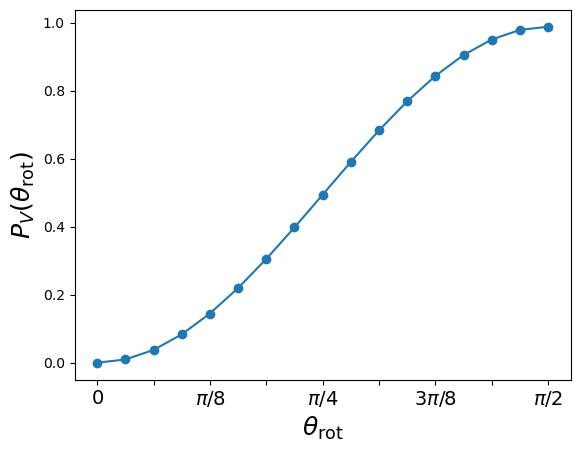

In [10]:
plt.plot(theta_rots, p_v)
plt.scatter(theta_rots, p_v)
plt.xlabel(r"$\theta_{\rm rot}$", fontsize=18)
plt.ylabel(r"$P_V(\theta_{\rm rot})$", fontsize=18)
plt.xticks(np.linspace(0,pi/2,9), [r"$0$","",r"$\pi/8$","",r"$\pi/4$","",r"$3\pi/8$","",r"$\pi/2$"], fontsize=14)
# plt.savefig("fig/pol_prob.eps", bbox_inches="tight")